In [1]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt,sklearn as sk, seaborn as sns, random as rd
from sklearn.model_selection import StratifiedShuffleSplit
train_set=pd.read_csv("Liver Patient Dataset (LPD)_train.csv",encoding= 'unicode_escape')
test_set=pd.read_excel("test.xlsx")
# print(train_set.columns,"\n\n")
# print(test_set)
# train_set_label=train_set['Result']
# train_set_features=train_set.drop(columns='Result',inplace=False)

In [2]:
train_set['Gender of the patient']=train_set['Gender of the patient'].replace(['Male','Female'],[0,1])

In [3]:
print(train_set.columns)
print(train_set.corr()['Result'])

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result'],
      dtype='object')
Age of the patient                     -0.004759
Gender of the patient                   0.004238
Total Bilirubin                        -0.225061
Direct Bilirubin                       -0.249538
 Alkphos Alkaline Phosphotase          -0.183356
 Sgpt Alamine Aminotransferase         -0.165914
Sgot Aspartate Aminotransferase        -0.158660
Total Protiens                          0.030370
 ALB Albumin                            0.160346
A/G Ratio Albumin and Globulin Ratio    0.158350
Result                                  1.000000
Name: Result, dtype: float64


#Gender and age of the patient has negligible correlation with the label so we discard it

In [4]:
train_set=train_set.drop(columns=['Age of the patient', 'Gender of the patient'])

# imputing the data
imputing is necessary to deal with null values. here we used simpleimputer which replaces the null values with median of all values of the particular feature

In [5]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
# train_set.columns = train_set.columns.astype(str)
train_set=imputer.fit_transform(train_set)

In [6]:
print(train_set)
col=['Total Bilirubin','Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio','Result']
train_set=pd.DataFrame(train_set,columns=col)

[[7.00e-01 1.00e-01 1.87e+02 ... 3.30e+00 9.00e-01 1.00e+00]
 [1.09e+01 5.50e+00 6.99e+02 ... 3.20e+00 7.40e-01 1.00e+00]
 [7.30e+00 4.10e+00 4.90e+02 ... 3.30e+00 8.90e-01 1.00e+00]
 ...
 [6.80e+00 3.00e+00 5.42e+02 ... 3.10e+00 9.00e-01 1.00e+00]
 [1.90e+00 1.00e+00 2.31e+02 ... 1.60e+00 6.00e-01 1.00e+00]
 [3.10e+00 1.60e+00 2.53e+02 ... 3.90e+00 1.30e+00 1.00e+00]]


In [93]:
print(train_set.head(10))

   Total Bilirubin  Direct Bilirubin   Alkphos Alkaline Phosphotase  \
0              0.7               0.1                          187.0   
1             10.9               5.5                          699.0   
2              7.3               4.1                          490.0   
3              1.0               0.4                          182.0   
4              3.9               2.0                          195.0   
5              1.8               0.7                          208.0   
6              0.9               0.2                          154.0   
7              0.9               0.3                          202.0   
8              0.9               0.3                          202.0   
9              0.7               0.2                          290.0   

    Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
0                            16.0                             18.0   
1                            64.0                            100.0   
2       

In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Total Bilirubin                       30691 non-null  float64
 1   Direct Bilirubin                      30691 non-null  float64
 2    Alkphos Alkaline Phosphotase         30691 non-null  float64
 3    Sgpt Alamine Aminotransferase        30691 non-null  float64
 4   Sgot Aspartate Aminotransferase       30691 non-null  float64
 5   Total Protiens                        30691 non-null  float64
 6    ALB Albumin                          30691 non-null  float64
 7   A/G Ratio Albumin and Globulin Ratio  30691 non-null  float64
 8   Result                                30691 non-null  float64
dtypes: float64(9)
memory usage: 2.1 MB


#It can be seen that there are 9 columns

#Now, split the data into training and test set with label and features in each

In [9]:
from sklearn.model_selection import train_test_split
train_features,test_features,train_label,test_label=train_test_split(train_set.drop(columns=['Result']),train_set['Result'],test_size=0.2)


In [10]:
print("Train_features:\n")
print(train_features.info(),"\n")

Train_features:

<class 'pandas.core.frame.DataFrame'>
Index: 24552 entries, 7329 to 9687
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Total Bilirubin                       24552 non-null  float64
 1   Direct Bilirubin                      24552 non-null  float64
 2    Alkphos Alkaline Phosphotase         24552 non-null  float64
 3    Sgpt Alamine Aminotransferase        24552 non-null  float64
 4   Sgot Aspartate Aminotransferase       24552 non-null  float64
 5   Total Protiens                        24552 non-null  float64
 6    ALB Albumin                          24552 non-null  float64
 7   A/G Ratio Albumin and Globulin Ratio  24552 non-null  float64
dtypes: float64(8)
memory usage: 1.7 MB
None 



In [11]:
print("Test_features:\n")
print(test_features.info(),"\n")

Test_features:

<class 'pandas.core.frame.DataFrame'>
Index: 6139 entries, 18430 to 23787
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Total Bilirubin                       6139 non-null   float64
 1   Direct Bilirubin                      6139 non-null   float64
 2    Alkphos Alkaline Phosphotase         6139 non-null   float64
 3    Sgpt Alamine Aminotransferase        6139 non-null   float64
 4   Sgot Aspartate Aminotransferase       6139 non-null   float64
 5   Total Protiens                        6139 non-null   float64
 6    ALB Albumin                          6139 non-null   float64
 7   A/G Ratio Albumin and Globulin Ratio  6139 non-null   float64
dtypes: float64(8)
memory usage: 431.6 KB
None 



In [12]:
print("Train_label:\n")
print(train_label.info(),"\n")
print("Test_label:\n")
print(test_label.info(),"\n")

Train_label:

<class 'pandas.core.series.Series'>
Index: 24552 entries, 7329 to 9687
Series name: Result
Non-Null Count  Dtype  
--------------  -----  
24552 non-null  float64
dtypes: float64(1)
memory usage: 383.6 KB
None 

Test_label:

<class 'pandas.core.series.Series'>
Index: 6139 entries, 18430 to 23787
Series name: Result
Non-Null Count  Dtype  
--------------  -----  
6139 non-null   float64
dtypes: float64(1)
memory usage: 95.9 KB
None 



#Now we use different data visualization methods to gain insights and see the relation between different features and label

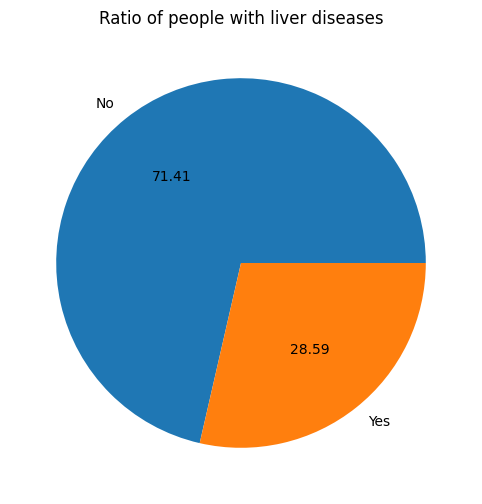

In [64]:
plt.figure(figsize=(10,6))
plt.title("Ratio of people with liver diseases")
plt.pie(train_set["Result"].value_counts(),labels=['No','Yes'],autopct="%.2f")
plt.show()

#The Pie-chart shows that the 28.6% of the total people in the data set suffer from liver-diseases

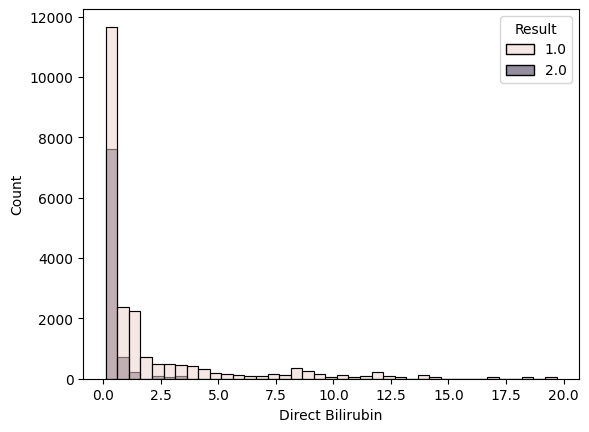

In [14]:
sns.histplot(data=train_set,x="Direct Bilirubin",hue="Result",binwidth=0.5)
plt.show()


#The histogram shows that people with low direct bilirubin are more likely to suffer from liver-diseases

<Axes: xlabel='Result', ylabel=' Alkphos Alkaline Phosphotase'>

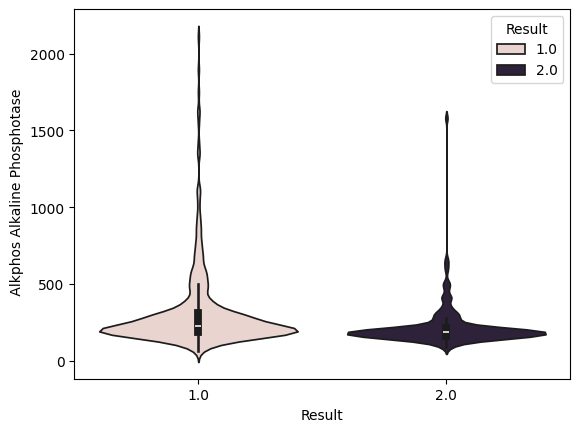

In [73]:
sns.violinplot(data=train_set,y=" Alkphos Alkaline Phosphotase",x="Result",hue="Result")


#It can be seen that people with Alkphos Alkaline Phosphotase around 145 are more likely to suffer from liver disease

In [69]:
print(train_set[" Alkphos Alkaline Phosphotase"].max())
print(train_set[" Alkphos Alkaline Phosphotase"].mean())
print(train_set[" Alkphos Alkaline Phosphotase"].min())
this=train_set[train_set["Result"]==2.0]
print(this[" Alkphos Alkaline Phosphotase"].value_counts().head(25))





2110.0
286.9985337721156
63.0
 Alkphos Alkaline Phosphotase
145.0    305
180.0    293
209.0    282
165.0    267
158.0    242
195.0    200
182.0    196
160.0    168
146.0    159
162.0    159
198.0    156
310.0    156
194.0    154
159.0    150
192.0    149
188.0    149
201.0    149
202.0    147
206.0    145
178.0    145
410.0    110
208.0    110
191.0    107
185.0    107
163.0    105
Name: count, dtype: int64


<Axes: xlabel='Result', ylabel=' ALB Albumin'>

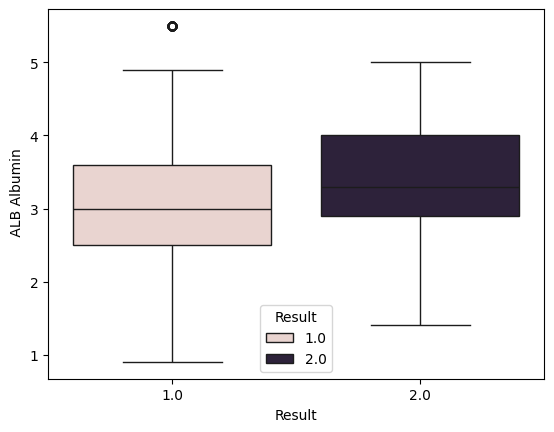

In [79]:
sns.boxplot(data=train_set,y=" ALB Albumin",x='Result',hue="Result")


#From the above density plot, we can see that people with ALB alnumin in the range 3 to 4 are more likely to suffer from liver diseases

<Axes: xlabel=' Sgpt Alamine Aminotransferase', ylabel='Density'>

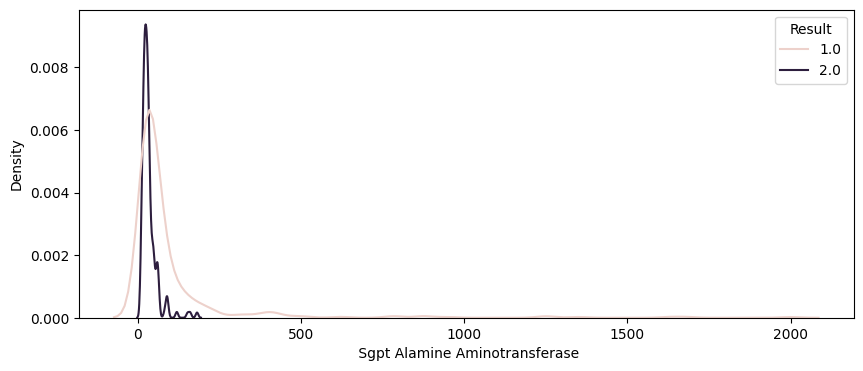

In [86]:
plt.figure(figsize=(10,4))
sns.kdeplot(data=train_set,x=" Sgpt Alamine Aminotransferase",hue="Result",)

#From the above box-plot, we can see that people with Sgpt Alamine Aminotransferase 2.8 to 4.4 are more likely to get liver diseases

In [19]:
print(train_set[" ALB Albumin"].max())
print(train_set[" ALB Albumin"].mean())
print(train_set[" ALB Albumin"].min())
this=train_set[train_set["Result"]==2.0]
print(this[" ALB Albumin"].value_counts().head(50))





5.5
3.129656902675052
0.9
 ALB Albumin
3.0    581
2.9    509
3.1    500
3.5    475
3.2    474
4.0    465
3.9    433
4.1    414
4.2    398
3.8    353
3.6    352
3.7    350
2.3    311
3.3    311
4.4    295
2.6    264
2.5    253
2.2    214
4.3    203
2.7    162
2.8    154
4.5    145
1.9    114
3.4    111
1.6    108
2.0    108
2.4    108
4.6    107
1.4    105
2.1    100
1.8     55
1.7     52
5.0     49
4.7     48
4.8     47
4.9     46
Name: count, dtype: int64


<Axes: >

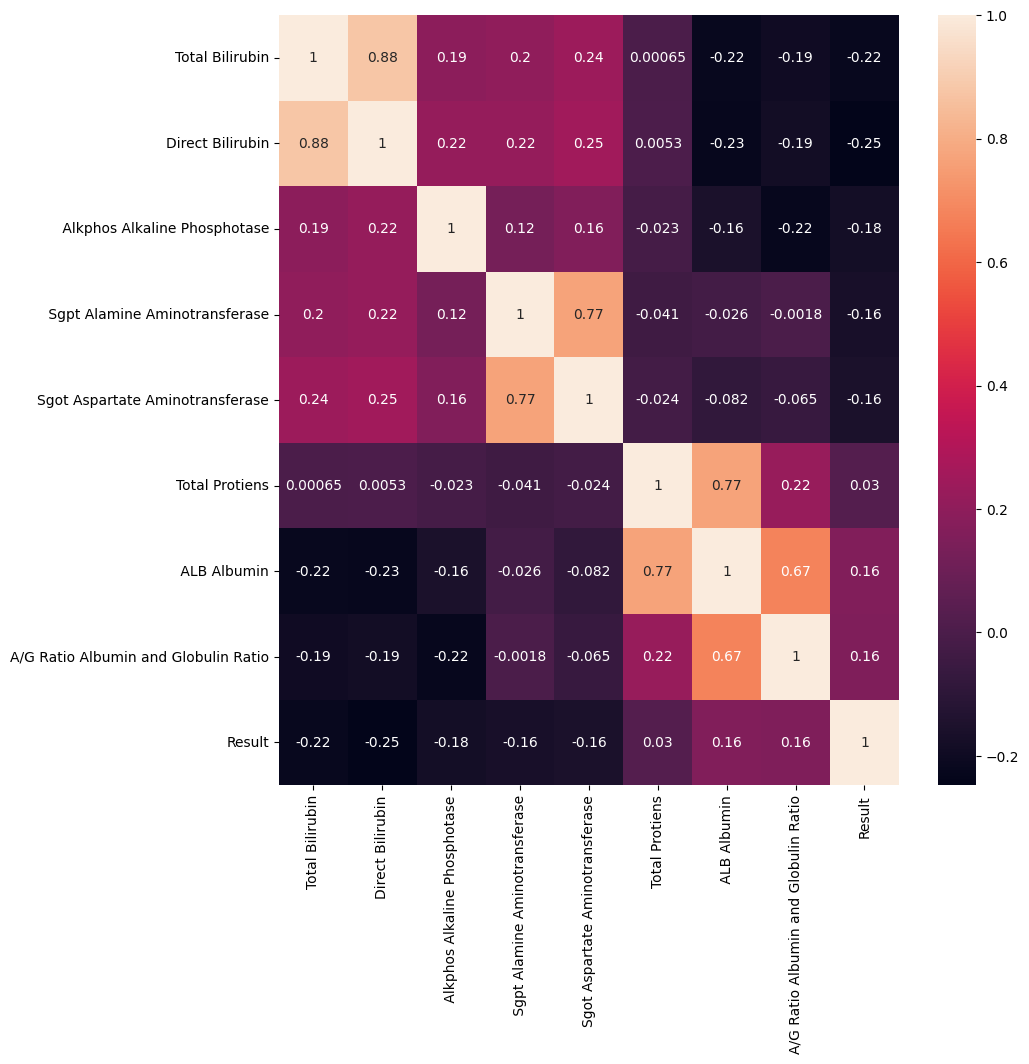

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(data=train_set.corr(),annot=True)


#The heatmap above shows the correlation between different attributes of the data set with each other

# Model creation
Different classification algorithms are applied to train the model namely K-nearest neighbour, Logistic regression, Support Vector Machine, Decision Tree classifier and Random Forest Classifier

# Parameter Tuning
Before training the models best hyper parameter is chosen by the means of parameter tuning. we do so either by using grid search if there are more than 1 hyperparameters or looping different values for a parameter if there is only one hyperparameter and selct the best one

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV




In [22]:

# k- Narest Neighbour model
max_neighbours=15
mean_acc=np.zeros((max_neighbours-1))
for i in range(1,max_neighbours):
    knn=KNeighborsClassifier(n_neighbors=i).fit(train_features,train_label)
    knn_op=knn.predict(test_features)
    mean_acc[i-1]=accuracy_score(test_label,knn_op)
best_k=mean_acc.argmax()+1
knn=KNeighborsClassifier(n_neighbors=best_k).fit(train_features,train_label)
knn_pred=knn.predict(test_features)
knn_score=accuracy_score(test_label,knn_pred)
print("For knn, the best accuracy was",accuracy_score(test_label,knn_pred))


For knn, the best accuracy was 0.9951132106206223


In [37]:
#logistic Regression
solver=['lbfgs', 'sag', 'newton-cholesky', 'saga', 'newton-cg', 'liblinear']
best_solver=''
j=0
for i in solver:
    logreg=LogisticRegression(solver=i)
    logreg.fit(train_features,train_label)
    predict=logreg.predict(test_features)
    mean_acc[j]=accuracy_score(predict,test_label)
    best_solver=mean_acc.argmax()+1
print("best_solver is:",solver[best_solver])
logreg=LogisticRegression(solver=solver[best_solver])
logreg.fit(train_features,train_label)
lr_predict=logreg.predict(test_features)
print("For logistic regression, ACcuracy is:",accuracy_score(test_label,lr_predict))

    

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Pyth

best_solver is: newton-cholesky
For logistic regression, ACcuracy is: 0.7251995438996579


In [94]:
print(lr_predict)

[1. 2. 1. ... 1. 1. 1.]


In [38]:
lr_score=accuracy_score(test_label,predict)


In [39]:
#Decision Tree Classifier
dtc=DecisionTreeClassifier(class_weight='balanced')
param_grid={
    'max_depth':[3,4,5,6,7,8],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,3,4],
    'random_state':[0,42]
}
grid_search=GridSearchCV(dtc,param_grid,cv=5)
grid_search.fit(train_features,train_label)
print(grid_search.best_params_)
dtc=DecisionTreeClassifier(**grid_search.best_params_,class_weight='balanced')
dtc.fit(train_features,train_label)
dtc_predict=dtc.predict(test_features)
print("Accuracy for DTC is:",accuracy_score(test_label,dtc_predict))


{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}
Accuracy for DTC is: 0.7572894608242384


In [40]:
dtc_score=accuracy_score(test_label,predict)

In [41]:
#Random forest classifier'
rfc=RandomForestClassifier()
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
 }
grid_search=GridSearchCV(rfc,param_grid)
grid_search.fit(train_features,train_label)
rfc=RandomForestClassifier(**grid_search.best_params_)
rfc.fit(train_features,train_label)
rfc_predict=rfc.predict(test_features)
print("The accuracy for RFC is:",accuracy_score(test_label,rfc_predict))



The accuracy for RFC is: 0.7884020198729434


In [42]:
rfc_score=accuracy_score(test_label,predict)

In [26]:
kernels = {'linear':0, 'poly':0, 'rbf':0, 'sigmoid':0}
best = ''
for i in kernels:
    svm = SVC(kernel=i)
    svm.fit(train_features, train_label) 
    yhat = svm.predict(test_features)
    kernels[i]=f1_score(test_label, yhat, average="weighted")
    if kernels[i] == max(kernels.values()):
        best = i
svm = SVC(kernel=best)
svm.fit(train_features, train_label) 
svm_pred = svm.predict(test_features)
print(f'SVM f1_score kernel({best}): {f1_score(test_label, svm_pred)}')

SVM f1_score kernel(linear): 0.8233265720081135


In [44]:
svm_score=f1_score(test_label, svm_pred)

# Evalutaion of models
Evaluating the performance measures of each of the algorithm using confusion matrix, dist-plot comparision of predicted and actual values,different metrics of performance evaluation and classificaion report

In [51]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,confusion_matrix,classification_report
def print_score(model,test,pred):
    print("For",model,"model:\n\n")
    sns.heatmap(confusion_matrix(test,pred),annot=True,cmap='Blues') 
    plt.show()   
    sns.distplot(test,color="red",label="Test_label",hist=False)
    sns.distplot(pred,color='b',hist=False)
    plt.xlabel("Result")
    plt.ylabel("Count")
    plt.show()
    metrics={'Metrics':['Accuracy Score',"Mean absolute error",'Mean Squared Error','f1_Score'],
             'Score':[accuracy_score(test,pred),mean_absolute_error(test,pred),mean_squared_error(test,pred),f1_score(test,pred)]
             }
    df=pd.DataFrame(metrics)
    print(df)
    print(pd.DataFrame(classification_report(test,pred,output_dict=True)))

For K-Nearest Neighbour model:




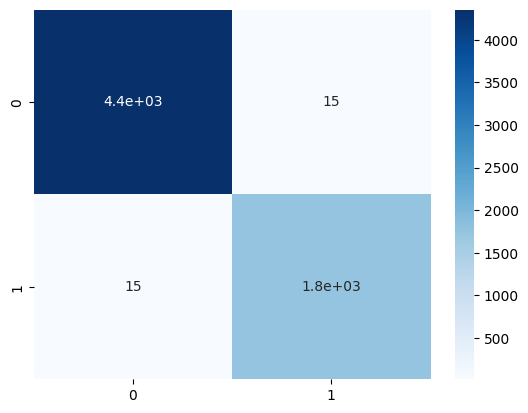

C:\Users\Dell\AppData\Local\Temp\ipykernel_7848\337926883.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test,color="red",label="Test_label",hist=False)
C:\Users\Dell\AppData\Local\Temp\ipykernel_7848\337926883.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred,color

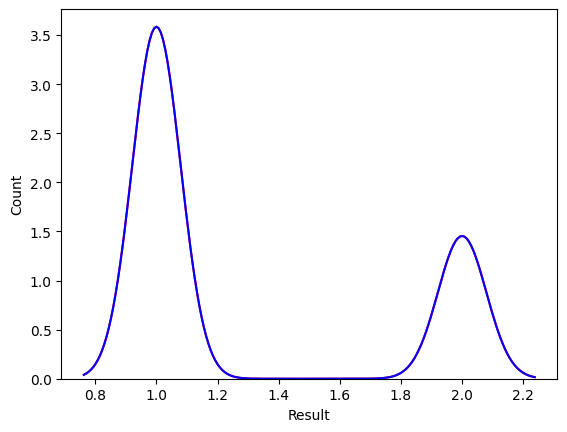

               Metrics     Score
0       Accuracy Score  0.995113
1  Mean absolute error  0.004887
2   Mean Squared Error  0.004887
3             f1_Score  0.996566
                   1.0         2.0  accuracy    macro avg  weighted avg
precision     0.996566     0.99153  0.995113     0.994048      0.995113
recall        0.996566     0.99153  0.995113     0.994048      0.995113
f1-score      0.996566     0.99153  0.995113     0.994048      0.995113
support    4368.000000  1771.00000  0.995113  6139.000000   6139.000000
For Logistic Regression model:




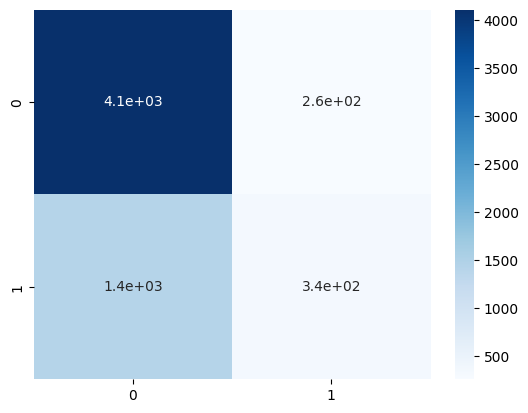

C:\Users\Dell\AppData\Local\Temp\ipykernel_7848\337926883.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test,color="red",label="Test_label",hist=False)
C:\Users\Dell\AppData\Local\Temp\ipykernel_7848\337926883.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred,color

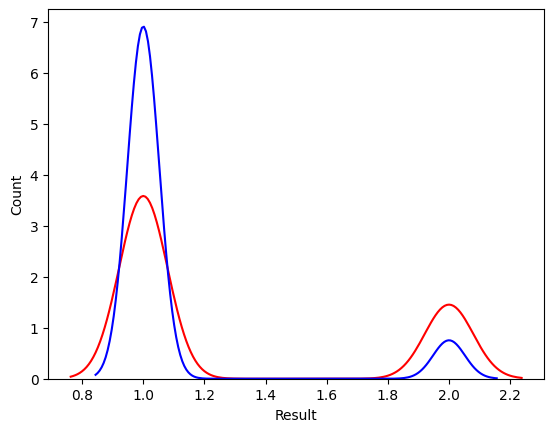

               Metrics     Score
0       Accuracy Score  0.725200
1  Mean absolute error  0.274800
2   Mean Squared Error  0.274800
3             f1_Score  0.829648
                   1.0          2.0  accuracy    macro avg  weighted avg
precision     0.742186     0.569536    0.7252     0.655861      0.692380
recall        0.940476     0.194241    0.7252     0.567358      0.725200
f1-score      0.829648     0.289684    0.7252     0.559666      0.673877
support    4368.000000  1771.000000    0.7252  6139.000000   6139.000000
For DecisionTreeClassifier model:




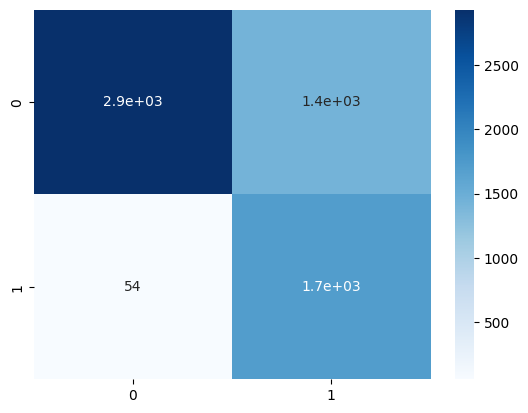

C:\Users\Dell\AppData\Local\Temp\ipykernel_7848\337926883.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test,color="red",label="Test_label",hist=False)
C:\Users\Dell\AppData\Local\Temp\ipykernel_7848\337926883.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred,color

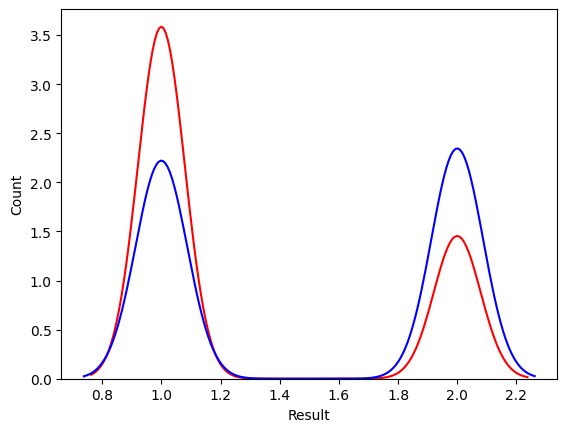

               Metrics     Score
0       Accuracy Score  0.757289
1  Mean absolute error  0.242711
2   Mean Squared Error  0.242711
3             f1_Score  0.797389
                   1.0          2.0  accuracy    macro avg  weighted avg
precision     0.981916     0.544561  0.757289     0.763238      0.855746
recall        0.671245     0.969509  0.757289     0.820377      0.757289
f1-score      0.797389     0.697400  0.757289     0.747395      0.768544
support    4368.000000  1771.000000  0.757289  6139.000000   6139.000000
For Random Forest Classifier model:




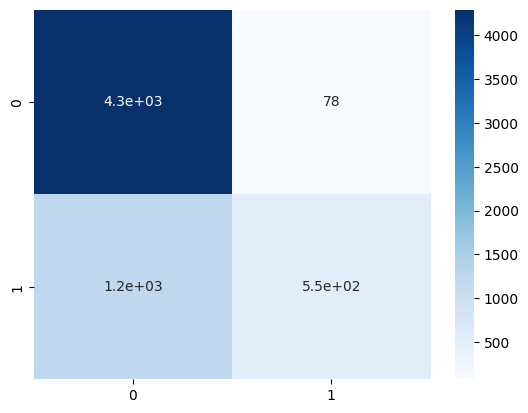

C:\Users\Dell\AppData\Local\Temp\ipykernel_7848\337926883.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test,color="red",label="Test_label",hist=False)
C:\Users\Dell\AppData\Local\Temp\ipykernel_7848\337926883.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred,color

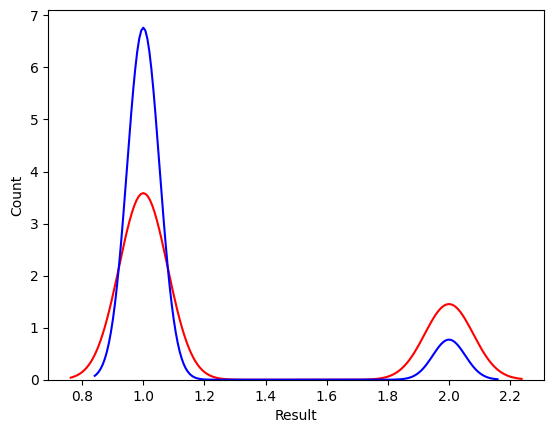

               Metrics     Score
0       Accuracy Score  0.788402
1  Mean absolute error  0.211598
2   Mean Squared Error  0.211598
3             f1_Score  0.868509
                   1.0          2.0  accuracy    macro avg  weighted avg
precision     0.778443     0.875796  0.788402     0.827120      0.806528
recall        0.982143     0.310559  0.788402     0.646351      0.788402
f1-score      0.868509     0.458524  0.788402     0.663517      0.750235
support    4368.000000  1771.000000  0.788402  6139.000000   6139.000000
For Support Vector Machine model:




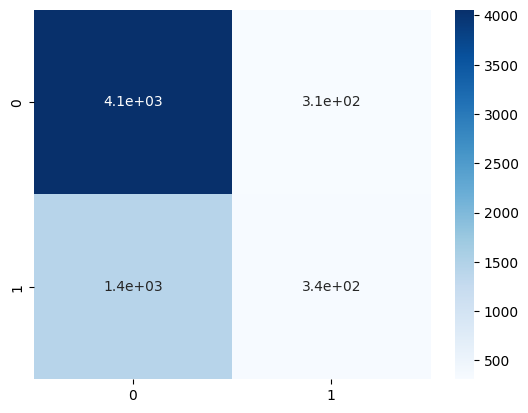

C:\Users\Dell\AppData\Local\Temp\ipykernel_7848\337926883.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test,color="red",label="Test_label",hist=False)
C:\Users\Dell\AppData\Local\Temp\ipykernel_7848\337926883.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred,color

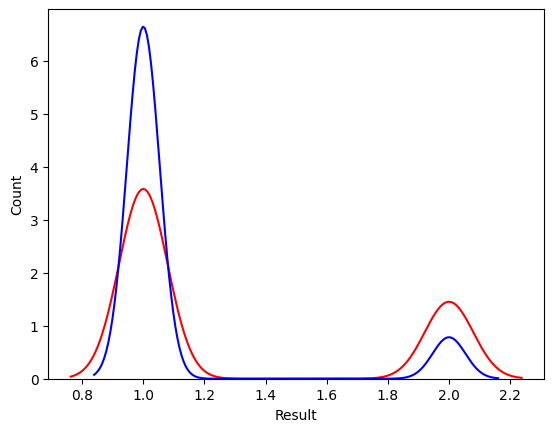

               Metrics     Score
0       Accuracy Score  0.716240
1  Mean absolute error  0.283760
2   Mean Squared Error  0.283760
3             f1_Score  0.823327
                   1.0          2.0  accuracy    macro avg  weighted avg
precision     0.739075     0.522411   0.71624     0.630743      0.676571
recall        0.929258     0.190853   0.71624     0.560055      0.716240
f1-score      0.823327     0.279570   0.71624     0.551448      0.666462
support    4368.000000  1771.000000   0.71624  6139.000000   6139.000000


In [53]:
predict_coll={"K-Nearest Neighbour":knn_pred,"Logistic Regression":lr_predict,"DecisionTreeClassifier":dtc_predict,
            "Random Forest Classifier":rfc_predict,"Support Vector Machine":svm_pred}
for i in predict_coll:
    print_score(i,test_label,predict_coll[i])

#Determining the best model among the tested ones based on their accuracy measurement

<Axes: >

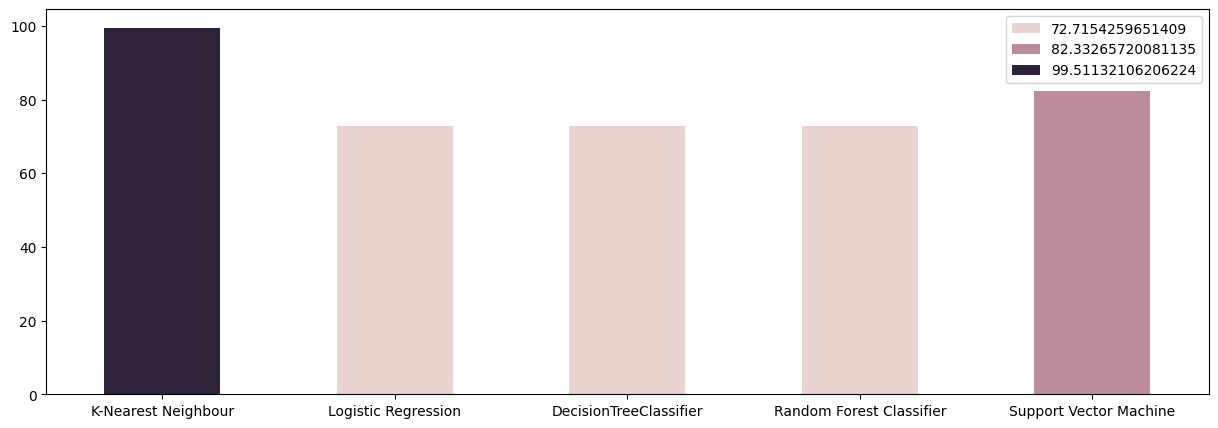

In [62]:
score_coll={"K-Nearest Neighbour":knn_score,"Logistic Regression":lr_score,"DecisionTreeClassifier":dtc_score,
            "Random Forest Classifier":rfc_score,"Support Vector Machine":svm_score}
for i in score_coll:
    score_coll[i]*=100
plt.figure(figsize=(15,5))
sns.barplot(x=score_coll.keys(),y=score_coll.values(),width=0.5,hue=score_coll.values())

we can see that for the given data set, k-nearest neighbour turned out to be the most accurate algorithm with 99.51% accuracy.

In [100]:
import pickle
models=[svm,knn,rfc,logreg,dtc]
with open('models.pkl','wb') as f:
    pickle.dump(models,f)
